In [1]:
# neccessary libs
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# directory path to read all preprocessed data
directoryPath = 'data_preprocessed/'
df = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.xlsx'):
    x = pd.read_excel(file_name)
    df = pd.concat([df,x],axis=0)

In [3]:
df.shape

(28317, 40)

In [4]:
# creating dataframe of 3 features from the original dataframe of 40 features
cols = ['RPM', 'TPS (%)', 'Inj Q Tor (mg-st)']
df_data = df[cols]
df_data.reset_index(drop=True)

,RPM,TPS (%),Inj Q Tor (mg-st)
0,1033.0,44.4,44.52
1,1037.0,44.8,44.38
2,1047.5,44.0,44.12
3,1041.5,38.4,38.50
4,1050.5,29.2,22.00
...,...,...,...
28312,0.0,0.0,0.00
28313,0.0,0.0,0.00
28314,0.0,0.0,0.00
28315,0.0,0.0,0.00


In [5]:
# null values checking
df_data.isnull().sum()

RPM                  0
TPS (%)              0
Inj Q Tor (mg-st)    0
dtype: int64

In [6]:
# stats values
df_data.describe()

,RPM,TPS (%),Inj Q Tor (mg-st)
count,28317.000000,28317.000000,28317.000000
mean,871.009076,23.836536,25.792261
std,273.634087,23.828555,21.087050
min,0.000000,0.000000,0.000000
25%,600.000000,0.000000,7.960000
50%,961.000000,23.600000,19.780000
75%,1102.000000,42.400000,42.860000
max,1733.000000,100.000000,86.820000


In [7]:
df_data['RPM']

0      1033.0
1      1037.0
2      1047.5
3      1041.5
4      1050.5
        ...  
305       0.0
306       0.0
307       0.0
308       0.0
309       0.0
Name: RPM, Length: 28317, dtype: float64

In [8]:
df_data['TPS (%)']

0      44.4
1      44.8
2      44.0
3      38.4
4      29.2
       ... 
305     0.0
306     0.0
307     0.0
308     0.0
309     0.0
Name: TPS (%), Length: 28317, dtype: float64

<AxesSubplot:xlabel='TPS (%)', ylabel='Count'>

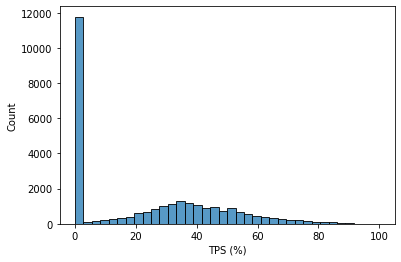

In [9]:
# TPS data spread
sns.histplot(df_data['TPS (%)'])

1. Most of the values lies between 0 to 5
2. As TPS % reaches to 40 the counts increases and then decreases as it tends to 80

<AxesSubplot:xlabel='RPM', ylabel='Count'>

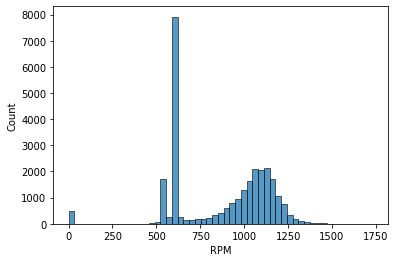

In [10]:
# hist plot of RPM feature
sns.histplot(df_data['RPM'])

1. Here you can see that some values lies nearly to 0.
2. Nearly more than 8000 points have value bewteen the range of 500 to 750.
3. Most of the RPM values lies in the range of 1000 to 1250.

In [11]:
# removing some data by using above distribution of data
Q1 = df_data.quantile(0.45)
Q3 = df_data.quantile(0.75)
IQR = Q3 - Q1
new_df = df_data[~((df_data < (Q1 - 1.5 * IQR)) |(df_data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df.reset_index(drop=True)

,RPM,TPS (%),Inj Q Tor (mg-st)
0,1033.0,44.4,44.52
1,1037.0,44.8,44.38
2,1047.5,44.0,44.12
3,1041.5,38.4,38.50
4,1050.5,29.2,22.00
...,...,...,...
18054,605.5,7.6,34.02
18055,611.0,0.0,27.26
18056,603.5,0.0,8.08
18057,605.0,0.0,14.42


In [12]:
new_df.shape

(18059, 3)

<AxesSubplot:xlabel='RPM', ylabel='Count'>

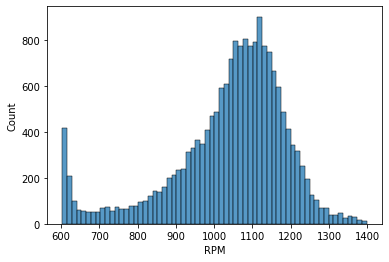

In [13]:
# again plot of the RPM data
sns.histplot(new_df['RPM'])

<AxesSubplot:xlabel='TPS (%)', ylabel='Count'>

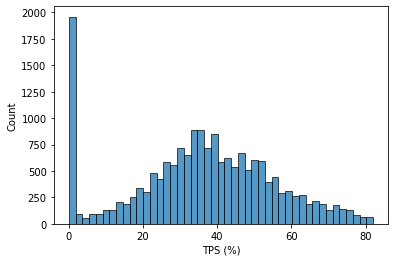

In [14]:
# again plot of the TPS (%) data
sns.histplot(new_df['TPS (%)'])

In [15]:
new_df.tail()

,RPM,TPS (%),Inj Q Tor (mg-st)
39,605.5,7.6,34.02
40,611.0,0.0,27.26
43,603.5,0.0,8.08
56,605.0,0.0,14.42
57,608.0,0.0,14.38


In [16]:
# scaling the features between -1 to 1
scaled_features = new_df.copy()
features = scaled_features[['RPM','TPS (%)']]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[['RPM','TPS (%)']] = features

In [17]:
scaled_features.head()

,RPM,TPS (%),Inj Q Tor (mg-st)
0,-0.044885,0.439534,44.52
1,-0.018567,0.460015,44.38
2,0.050517,0.419053,44.12
3,0.011040,0.132315,38.50
4,0.070255,-0.338753,22.00


In [18]:
# independent and targate values
X = scaled_features.iloc[:,:-1]
y = scaled_features['Inj Q Tor (mg-st)']

In [19]:
# splittin the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
# Linear Regresion model
lr_model = LinearRegression()
# fitting the model
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# prediction on test data
lr_pred = lr_model.predict(X_test)

In [22]:
# rmse score
# rmse if squared -false
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
lr_rmse

7.951915423762272

In [23]:
# r2 score 
lr_r2score = r2_score(y_test, lr_pred)
lr_r2score

0.8490114886399887

## Random Forest Model

In [24]:
# fitting the regression model
rf_reg = RandomForestRegressor(max_depth=7, n_estimators=50, random_state=0)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [25]:
# predition on test data
rf_prd = rf_reg.predict(X_test)

In [26]:
# rmse
rf_rmse = mean_squared_error(y_test, rf_prd, squared=False)
rf_rmse

7.019902415952167

In [27]:
# r2 score
rf_r2score = r2_score(y_test, rf_prd)
rf_r2score

0.8823308682849784

In [28]:
# Dataframe of actual vs  predicted
pred_df = pd.DataFrame()
pred_df['Actual_value'] = y_test
pred_df['Predicted_value'] = rf_prd

In [29]:
pred_df.tail()

,Actual_value,Predicted_value
4342,54.62,55.966224
1727,58.20,58.978221
4058,0.00,1.884233
1265,56.44,57.501907
125,42.46,41.748735


In [30]:
# Model performance Check
from prettytable import PrettyTable
  
columns = ["Models", "RMSE", "R2Score"]
  
myTable = PrettyTable(columns)
myTable.add_row(['Linear Regrssion',lr_rmse, lr_r2score])
myTable.add_row(['Random Forest',rf_rmse, rf_r2score])
print(myTable)

+------------------+-------------------+--------------------+
|      Models      |        RMSE       |      R2Score       |
+------------------+-------------------+--------------------+
| Linear Regrssion | 7.951915423762272 | 0.8490114886399887 |
|  Random Forest   | 7.019902415952167 | 0.8823308682849784 |
+------------------+-------------------+--------------------+
